<a href="https://colab.research.google.com/github/seolajo/DALC/blob/main/DALC%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

[참고강의](https://www.youtube.com/watch?v=dGjBhSHW9lg&t=4907s)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [ ]:
import multiprocessing #계산량이 많을 때 효율적인 프로세싱을 도움
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid']) #시각화 스타일 설정 #seaborn-whitegrid 스타일로 설정
#print(plt.style.available) -> 가능한 시각화 스타일의 이름 나열됨

In [ ]:
from sklearn.svm import SVR, SVC #서포트 벡터 머신 알고리즘 제공/ SVR : sv회귀 , SVC : sv분류
from sklearn.datasets import load_boston, load_breast_cancer, load_diabetes, load_iris, load_wine #데이터셋 불러오기
from sklearn.pipeline import make_pipeline, Pipeline #특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV #교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
from sklearn.preprocessing import StandardScaler, MinMaxScaler #preprocessing : 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등)
from sklearn.manifold import TSNE #고차원의 데이터를 그보다 낮은 2,3차원 데이터로 시각화하는데 쓰이는 알고리즘

* [(데이터)스케일링이란?](https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling)
*  [manifold란? TSNE알고리즘이란?](https://agiantmind.tistory.com/215)
*  [multiprocessing이란?](https://wikidocs.net/85603)

## SVM을 이용한 회귀 모델과 분류 모델

### [참고]분류 또는 회귀용 데이터 세트

| API | 설명 |
|-----|------|
| `datasets.load_boston()` | 미국 보스턴의 집에 대한 특징과 가격 데이터 (회귀용) |
| `datasets.load_breast_cancer()` | 위스콘신 유방암 특징들과 악성/음성 레이블 데이터 (분류용) |
| `datasets.load_diabetes()` | 당뇨 데이터 (회귀용) |
| `datasets.load_digits()` | 0에서 9까지 숫자 이미지 픽셀 데이터 (분류용) |
| `datasets.load_iris()` | 붓꽃에 대한 특징을 가진 데이터 (분류용) |

### SVM을 사용한 회귀 모델 (SVR)

In [ ]:
#BOSTON(회귀용 데이터셋)
X, y = load_boston(return_X_y=True)#함수들의 매개변수 return_X_y를 True로 설정하면 Bunch 클래스가 아닌 특성 X와 타깃 y로 반환
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
#random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
#X_train, X_test, y_train, y_test : 분할시킬 데이터로 train_test_split의 파라미터 안에 데이터(특성 X)와 레이블(타깃 y)을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

model = SVR()
model.fit(X_train, y_train)
#데이터를 어떤 모델에 적합시킬 때, 그 모델 클래스의 인스턴스의 fit() 메서드를 호출한다
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.2177283706374875
평가 데이터 점수: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [ ]:
#BREAST_CANCER
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [ ]:
#회귀(boston)

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Linear SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))

#Polynomial SVR
polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))

#RBF SVR
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print("RBF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.715506620496448
Linear SVR 평가 데이터 점수: 0.6380398541506058
Polynomial SVR 학습 데이터 점수: 0.2024454261446289
Polynomial SVR 평가 데이터 점수: 0.133668450367462
RBF SVR 학습 데이터 점수: 0.2177283706374875
RBF SVR 평가 데이터 점수: 0.13544178468518187


In [ ]:
#분류(breast_cancer)

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Linear SVC
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))

#Polynomial SVC
polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

#RBF SVC
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 평가 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 점수: 0.9014084507042254
RBF SVC 평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
#Polynomial SVC
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')  #기본값(degree=3(degree값은 poly만 있음) / C=1.0 / gamma='scale')
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

#실행시간 더딘 점 참고
#매개변수 튜닝하니 값이 훨씬 나아짐

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [ ]:
#RBF SVC
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(2.0, 'scale'))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

#C값과 gamma를 직접 이리저리 바꿔가며 최적을 찾아본다.

kernel=rbf, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수: 0.9154929577464789
RBF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용(MinMaxScaler 사용)
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


In [ ]:
#StandardScaler로 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#스케일링해줬으니 다시 적합 실행 및 결과보기. 데이터 전처리 두번째 셀과 동일.
model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9835680751173709
평가 데이터 점수: 0.986013986013986


In [ ]:
#MinMaxScaler로 스케일링
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#스케일링해줬으니 다시 적합 실행 및 결과보기
model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9812206572769953
평가 데이터 점수: 0.986013986013986


## Kernel SVR

### 보스턴 주택 가격

In [ ]:
# 1. 전처리 과정
# 1-1. 데이터 나누기
'''
boston = datasets.load_boston()
X = boston.data
y = boston.target

--(더 간단한 표현식)--> X, y = load_boston(return_X_y=True)
'''
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 1-2. 스케일링 과정
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 1-3. 매개변수 튜닝(적합)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# 1-4. 결과출력
print("RBF SVR 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

RBF SVR 학습 데이터 점수: 0.7114803222844769
RBF SVR 평가 데이터 점수: 0.5010005875652976


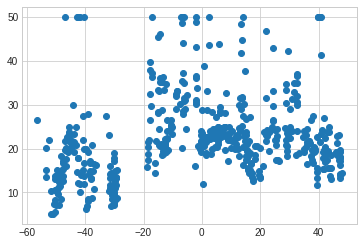

In [ ]:
# 5. 왜 점수가 낮게/높게 나오는지 확인
#TSNE 알고리즘: 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
#n_components=n : n차원으로 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

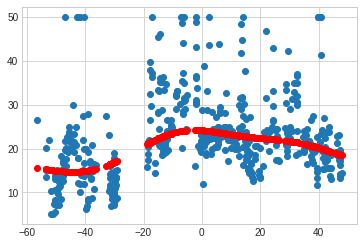

In [ ]:
# 6. 적합 후 예측결과 시각화
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [ ]:
# 7. 교차검증 실행(cross validation)
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.0216794 , 0.01857066, 0.02056003, 0.02040672, 0.02090621]),
 'score_time': array([0.00397754, 0.00382662, 0.0036962 , 0.00370693, 0.00388694]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [ ]:
# 8. try1: 그리트서치(GridSearchCV)이용해 파이프 파라미터 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
# 9. 최적 찾기
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
# 10. try2: 위의 try1에서 최적의 커널로 나온 커널을 파이프라인에서 기본으로 설정하고, 다른 요소들을 param_grid에 추가하여 다시 최적 탐색
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]
#gamma, C, epsilon을 어떤 값을 취해야 최적일지 param_grid에 추가
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma'

In [ ]:
# 11. 다시 최적 찾기
gs.best_estimator_
# gamma='scale', C=1.0, epsilon=0.01일때 최적이라는 결과도출

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [ ]:
#셀을 채워보세요. 앞선 보스턴 주택 가격과 동일하게 하면 됩니다. 단 데이터는 당뇨병 데이터셋을 불러와주세요.
# 1. 전처리 과정(불러오는 데이터만 다름)
# 1-1. 데이터 나누기
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 1-2. 스케일링 과정
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 1-3. 매개변수 튜닝(적합)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# 1-4. 결과출력
print("RBF SVR 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

RBF SVR 학습 데이터 점수: 0.20930026702620885
RBF SVR 평가 데이터 점수: 0.18293274404483395


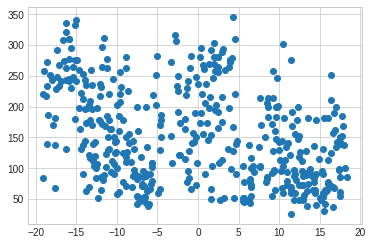

In [ ]:
# 5. 왜 점수가 낮게/높게 나오는지 확인
#TSNE 알고리즘: 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
#n_components=n : n차원으로 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

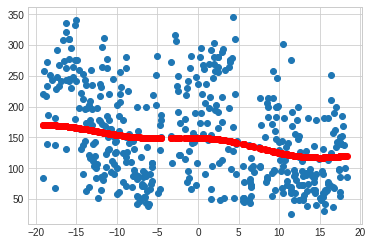

In [ ]:
# 6. 적합 후 예측결과 시각화
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [ ]:
# 7. 교차검증 실행(cross validation)
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01718354, 0.02033615, 0.01392007, 0.0135479 , 0.01088572]),
 'score_time': array([0.00332952, 0.00307298, 0.00278401, 0.00285625, 0.00170898]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [ ]:
# 8. try1: 그리트서치(GridSearchCV)이용해 파이프 파라미터 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
# 9. 최적 찾기
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
# 10. try2: 위의 try1에서 최적의 커널로 나온 커널을 파이프라인에서 기본으로 설정하고, 다른 요소들을 param_grid에 추가하여 최적 탐색
#gamma, C, epsilon을 어떤 값을 취해야 최적일지 param_grid에 추가
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]
#gamma, C, epsilon을 어떤 값을 취해야 최적일지 param_grid에 추가
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='sigmoid',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__ga

In [ ]:
# 11. 다시 최적 찾기
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

## Kernel SVC

**#8에 오류가 있습니다! svc의 설정 요소에는 epsilon이 없습니다. #8의 param_grid에 설정된 epsilon을 지워주세요!**

### 유방암

In [ ]:
# 1. 전처리 과정(불러오는 데이터만 다름)
# 1-1. 데이터 나누기
X, y = load_breast_cancer(return_X_y=True) #데이터 로드
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 1-2. 스케일링 과정
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 1-3. 매개변수 튜닝(적합)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 1-4. 결과출력
print("RBF SVR 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

RBF SVR 학습 데이터 점수: 0.9846153846153847
RBF SVR 평가 데이터 점수: 0.9824561403508771


* SVR과 달리 SVC는 데이터를 보여준 후 그 바깥에 구분이 되는 부분에 대한 시각화를 위한 코드 추가해주어야 하므로 그에 따른 함수를 추가 작성한다

In [ ]:
    """
    make_meshgrid(x, y, h=0.2)
    --> 매개변수 2개 = 2차원그리드 만드는 메소드

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional(그리드 간격 설정, 필수설정X)

    Returns
    -------
    xx, yy : ndarray
    """  
#2-1.시각화
#SVR과 달리 추가된 메서드
def make_meshgrid(x, y, h=0.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy 

In [ ]:
    """
    classifier의 결정 경계에 대한 플롯 생성

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """ 
#2-2시각화
#SVR과 달리 추가된 메서드
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  #contourf: 채워진 2차원(Filled 2-D) 등고선 플롯
  #생성한 격자 행렬 좌표값들에 대해 Classifier의 predict() 메소드로 예측을 하여 contour plot의 높이에 해당하는 Z 값 구함

  return out 

[contourf 설명](https://kr.mathworks.com/help/matlab/ref/contourf.html#responsive_offcanvas)

In [ ]:
# 3. 왜 점수가 낮게/높게 나오는지 확인
#TSNE 알고리즘: 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
#n_components=n : n차원으로 시각화
#SVR과 달리 TSNE의 n_components값을 2로 줌
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]              #윗줄에서 데이터를 2차원으로 시각화한 후 각 열을 X0, X1(각 x좌표, y좌표)로 분리
xx, yy = make_meshgrid(X0, X1)                 #maek_meshgrid함수 이용하여 2차원 그리드 생성(xx, yy(ndarray형 2차원 배열) 반환하는 메소드)

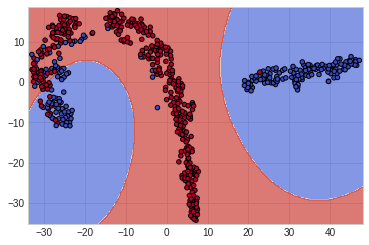

In [ ]:
# 4. 적합 후 예측결과 시각화
#SVR과 달라진 부분
model.fit(X_comp, y)

plot_contours(model,xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)        #classifier의 결정 경계에 대한 플롯 생성
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')#시각화(x좌표, y좌표, 나머지는 색깔 설정)

In [ ]:
# 5. 교차검증 실행(cross validation)
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00988412, 0.01032615, 0.00920558, 0.00797915, 0.00685596]),
 'score_time': array([0.00196838, 0.00205922, 0.00205731, 0.00219989, 0.00182128]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [ ]:
# 6. try1: 그리트서치(GridSearchCV)이용해 파이프 파라미터 찾기
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [ ]:
# 7. 최적 찾기
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
#8. try2: 위의 try1에서 최적의 커널로 나온 커널을 파이프라인에서 기본으로 설정하고, 다른 요소들을 param_grid에 추가하여 다시 최적 탐색
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]
#gamma, C을 어떤 값을 취해야 최적일지 param_grid에 추가
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [ ]:
# 11. 다시 최적 찾기
gs.best_estimator_
# gamma='scale', C=1.0 일때 최적이라는 결과도출

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("RBF SVR 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

RBF SVR 학습 데이터 점수: 0.975
RBF SVR 평가 데이터 점수: 0.9333333333333333


In [ ]:
def make_meshgrid(x, y, h=0.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy 

In [ ]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out 

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx, yy = make_meshgrid(X0, X1)

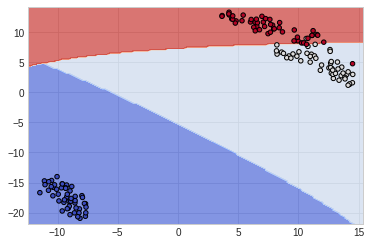

In [ ]:
model.fit(X_comp, y)

plot_contours(model,xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00240874, 0.00228238, 0.00216651, 0.00200915, 0.00162959]),
 'score_time': array([0.000741  , 0.00072265, 0.00071025, 0.00071383, 0.00051737]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]
#gamma, C을 어떤 값을 취해야 최적일지 param_grid에 추가
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)